In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("instagram.csv", encoding = 'latin1')
print(data.head())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0       3920.0     2586.0         1028.0         619.0        56.0   98.0   
1       5394.0     2727.0         1838.0        1174.0        78.0  194.0   
2       4021.0     2085.0         1188.0           0.0       533.0   41.0   
3       4528.0     2700.0          621.0         932.0        73.0  172.0   
4       2518.0     1704.0          255.0         279.0        37.0   96.0   

   Comments  Shares  Likes  Profile Visits  Follows  \
0       9.0     5.0  162.0            35.0      2.0   
1       7.0    14.0  224.0            48.0     10.0   
2      11.0     1.0  131.0            62.0     12.0   
3      10.0     7.0  213.0            23.0      8.0   
4       5.0     4.0  123.0             8.0      0.0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

In [42]:
data.head(5)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920.0,2586.0,1028.0,619.0,56.0,98.0,9.0,5.0,162.0,35.0,2.0,Here are some of the most important data visua...,#financeï¿½#moneyï¿½#businessï¿½#investingï¿½#...
1,5394.0,2727.0,1838.0,1174.0,78.0,194.0,7.0,14.0,224.0,48.0,10.0,Here are some of the best data science project...,#healthcareï¿½#healthï¿½#covidï¿½#dataï¿½#data...
2,4021.0,2085.0,1188.0,0.0,533.0,41.0,11.0,1.0,131.0,62.0,12.0,Learn how to train a machine learning model an...,#dataï¿½#datascienceï¿½#dataanalysisï¿½#dataan...
3,4528.0,2700.0,621.0,932.0,73.0,172.0,10.0,7.0,213.0,23.0,8.0,Hereï¿½s how you can write a Python program to...,#pythonï¿½#pythonprogrammingï¿½#pythonprojects...
4,2518.0,1704.0,255.0,279.0,37.0,96.0,5.0,4.0,123.0,8.0,0.0,Plotting annotations while visualizing your da...,#datavisualizationï¿½#datascienceï¿½#dataï¿½#d...


Before starting everything, let’s have a look at whether this dataset contains any null values or not:

In [43]:
print(data.info())

print("\n")

print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Impressions     99 non-null     float64
 1   From Home       99 non-null     float64
 2   From Hashtags   99 non-null     float64
 3   From Explore    99 non-null     float64
 4   From Other      99 non-null     float64
 5   Saves           99 non-null     float64
 6   Comments        99 non-null     float64
 7   Shares          99 non-null     float64
 8   Likes           99 non-null     float64
 9   Profile Visits  99 non-null     float64
 10  Follows         99 non-null     float64
 11  Caption         99 non-null     object 
 12  Hashtags        99 non-null     object 
dtypes: float64(11), object(2)
memory usage: 10.3+ KB
None


(100, 13)


In [44]:
data.isnull().sum()

Impressions       1
From Home         1
From Hashtags     1
From Explore      1
From Other        1
Saves             1
Comments          1
Shares            1
Likes             1
Profile Visits    1
Follows           1
Caption           1
Hashtags          1
dtype: int64

In [45]:
#So it has a null value in every column. Let’s drop all these null values and move further:


data = data.dropna()

print(data.shape)

(99, 13)


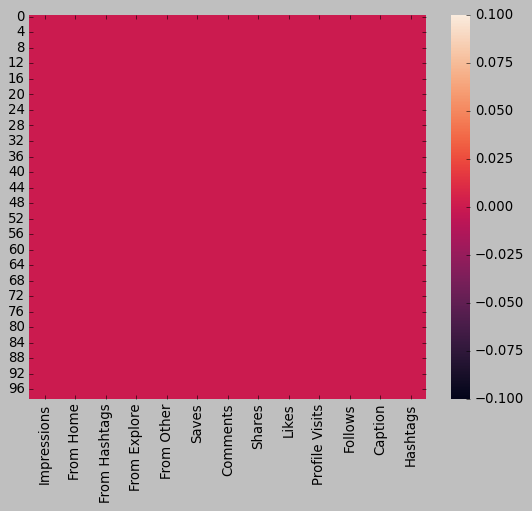

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64


In [46]:
sns.heatmap(data.isnull())

plt.show()

print(data.isnull().sum())

In [47]:
print(data.info())

print("\n")

print(data.dtypes)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Impressions     99 non-null     float64
 1   From Home       99 non-null     float64
 2   From Hashtags   99 non-null     float64
 3   From Explore    99 non-null     float64
 4   From Other      99 non-null     float64
 5   Saves           99 non-null     float64
 6   Comments        99 non-null     float64
 7   Shares          99 non-null     float64
 8   Likes           99 non-null     float64
 9   Profile Visits  99 non-null     float64
 10  Follows         99 non-null     float64
 11  Caption         99 non-null     object 
 12  Hashtags        99 non-null     object 
dtypes: float64(11), object(2)
memory usage: 10.8+ KB
None


Impressions       float64
From Home         float64
From Hashtags     float64
From Explore      float64
From Other        float64
Saves             float64
Comme

Now let’s start with analyzing the reach of my Instagram posts. I will first have a look at the distribution of impressions I have received from home:

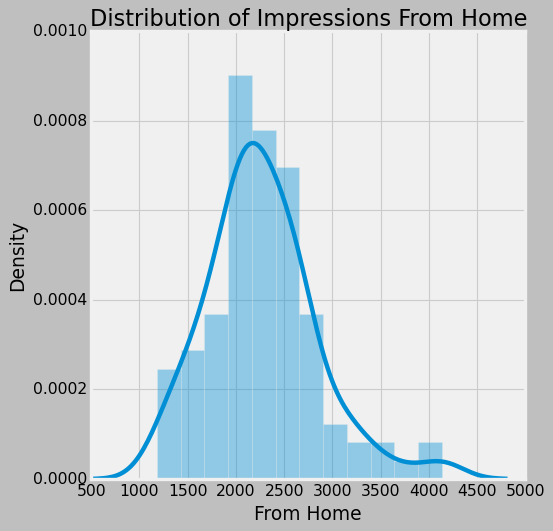

In [48]:
plt.figure(figsize=(7, 7))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Home")
sns.distplot(data['From Home'])
plt.show()

The impressions I get from the home section on Instagram shows how much my posts reach my followers. Looking at the impressions from home, I can say it’s hard to reach all my followers daily. Now let’s have a look at the distribution of the impressions I received from hashtags:

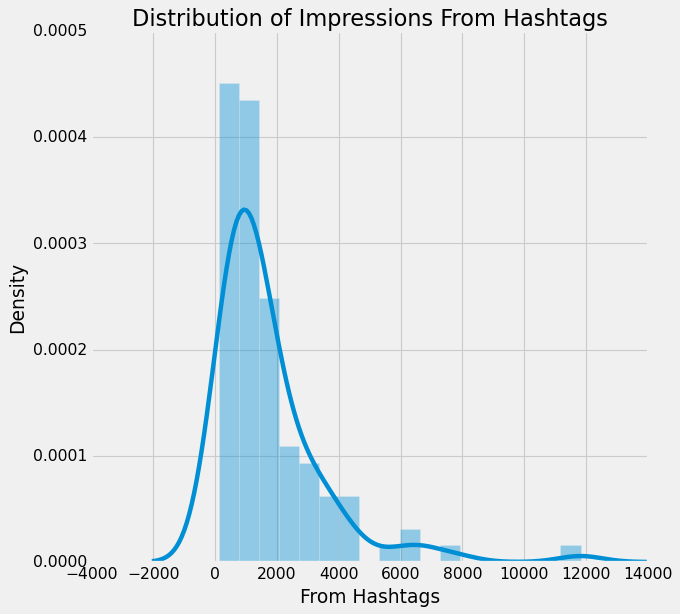

In [49]:
plt.figure(figsize=(8, 8))
plt.title("Distribution of Impressions From Hashtags")
sns.distplot(data['From Hashtags'])
plt.show()

Hashtags are tools we use to categorize our posts on Instagram so that we can reach more people based on the kind of content we are creating. Looking at hashtag impressions shows that not all posts can be reached using hashtags, but many new users can be reached from hashtags. Now let’s have a look at the distribution of impressions I have received from the explore section of Instagram:

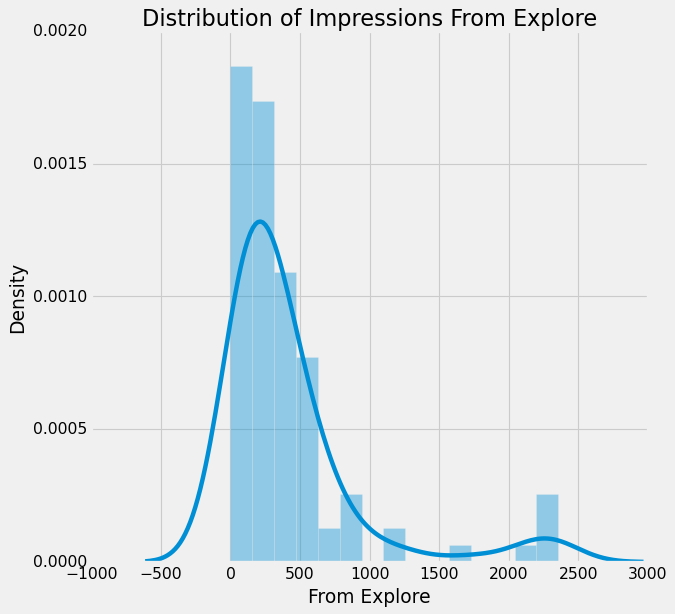

In [50]:
plt.figure(figsize=(8, 8))
plt.title("Distribution of Impressions From Explore")
sns.distplot(data['From Explore'])
plt.show()

The explore section of Instagram is the recommendation system of Instagram. It recommends posts to the users based on their preferences and interests. By looking at the impressions I have received from the explore section, I can say that Instagram does not recommend our posts much to the users. Some posts have received a good reach from the explore section, but it’s still very low compared to the reach I receive from hashtags.

Now let’s have a look at the percentage of impressions I get from various sources on Instagram:

In [51]:
home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()

labels = ['From Home','From Hashtags','From Explore','Other']
values = [home, hashtags, explore, other]

fig = px.pie(data, values=values, names=labels, 
             title='Impressions on Instagram Posts From Various Sources', hole=0.5)
fig.show()

print(labels)
print("\n")
print(values)

['From Home', 'From Hashtags', 'From Explore', 'Other']


[224513.0, 172087.0, 41287.0, 13587.0]


So the above donut plot shows that almost 50 per cent of the reach is from my followers, 38.1 per cent is from hashtags, 9.14 per cent is from the explore section, and 3.01 per cent is from other sources.



Now let’s analyze the content of my Instagram posts. The dataset has two columns, namely caption and hashtags, which will help us understand the kind of content I post on Instagram.

Let’s create a wordcloud of the caption column to look at the most used words in the caption of my Instagram posts:

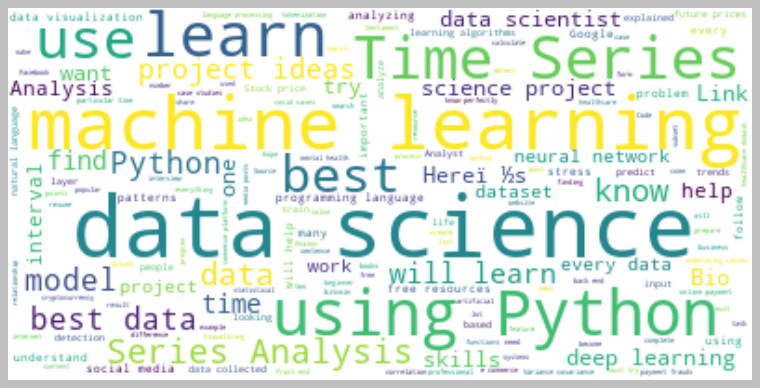

In [52]:
text = " ".join(i for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Now let’s create a wordcloud of the hashtags column to look at the most used hashtags in my Instagram posts:

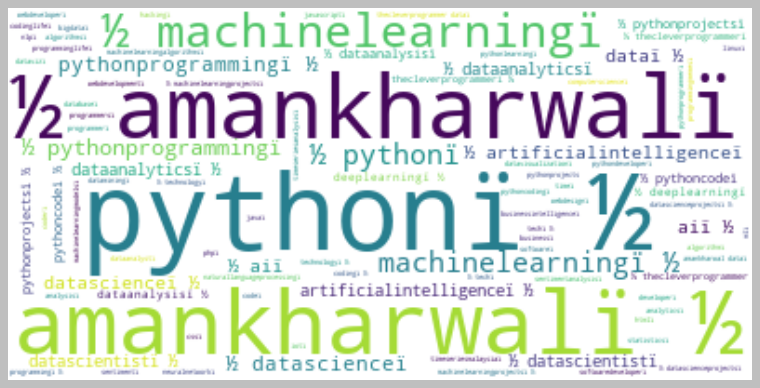

In [53]:
text = " ".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Now let’s analyze relationships to find the most important factors of our Instagram reach. It will also help us in understanding how the Instagram algorithm works.

Let’s have a look at the relationship between the number of likes and the number of impressions on my Instagram posts:

In [54]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Likes", size="Likes", trendline="ols", 
                    title = "Relationship Between Likes and Impressions")
figure.show()

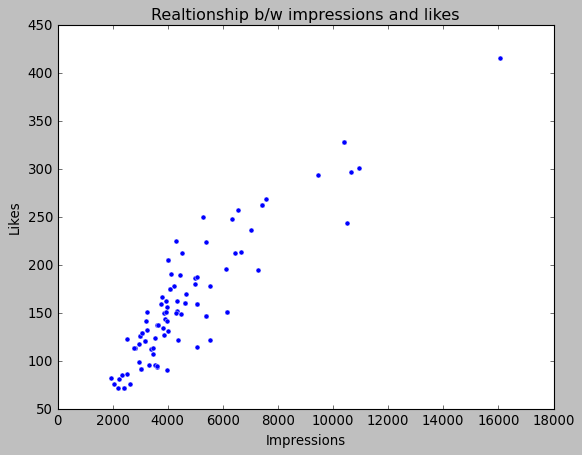

In [55]:
plt.figure(figsize=(8,6))
plt.title("Realtionship b/w impressions and likes")
sns.scatterplot(x="Impressions",y="Likes",data=data)
plt.xlabel("Impressions")
plt.ylabel("Likes")
plt.show()

There is a linear relationship between the number of likes and the reach I got on Instagram. Now let’s see the relationship between the number of comments and the number of impressions on my Instagram posts:

In [56]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Comments", size="Comments", trendline="ols", 
                    title = "Relationship Between Comments and Total Impressions")
figure.show()

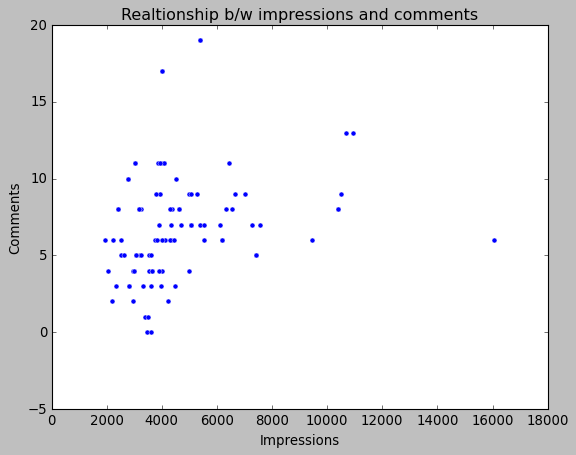

In [57]:
plt.figure(figsize=(8,6))
plt.title("Realtionship b/w impressions and comments")
sns.scatterplot(x="Impressions",y="Comments",data=data)
plt.xlabel("Impressions")
plt.ylabel("Comments")
plt.show()

It looks like the number of comments we get on a post doesn’t affect its reach. Now let’s have a look at the relationship between the number of shares and the number of impressions:

In [58]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Shares", size="Shares", trendline="ols", 
                    title = "Relationship Between Shares and Total Impressions")
figure.show()

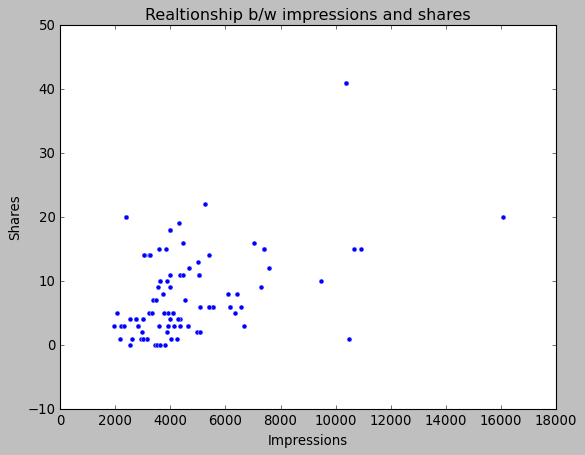

In [59]:
plt.figure(figsize=(8,6))
plt.title("Realtionship b/w impressions and shares")
sns.scatterplot(x="Impressions",y="Shares",data=data)
plt.xlabel("Impressions")
plt.ylabel("Shares")
plt.show()

A more number of shares will result in a higher reach, but shares don’t affect the reach of a post as much as likes do. Now let’s have a look at the relationship between the number of saves and the number of impressions:

In [60]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Saves", size="Saves", trendline="ols", 
                    title = "Relationship Between Post Saves and Total Impressions")
figure.show()

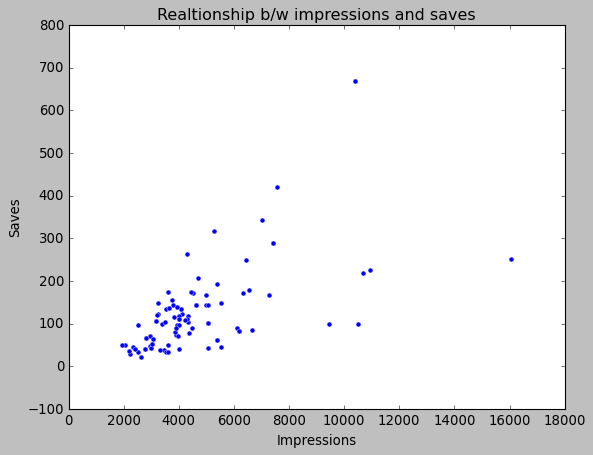

In [61]:
plt.figure(figsize=(8,6))
plt.title("Realtionship b/w impressions and saves")
sns.scatterplot(x="Impressions",y="Saves",data=data)
plt.xlabel("Impressions")
plt.ylabel("Saves")
plt.show()

There is a linear relationship between the number of times my post is saved and the reach of my Instagram post. Now let’s have a look at the correlation of all the columns with the Impressions column:

In [62]:
correlation = data.corr()
print(correlation["Impressions"].sort_values(ascending=False))

Impressions       1.000000
Likes             0.896277
From Hashtags     0.892682
Follows           0.804064
Profile Visits    0.774393
Saves             0.625600
From Home         0.603378
From Explore      0.498389
Shares            0.476617
From Other        0.429227
Comments          0.247201
Name: Impressions, dtype: float64


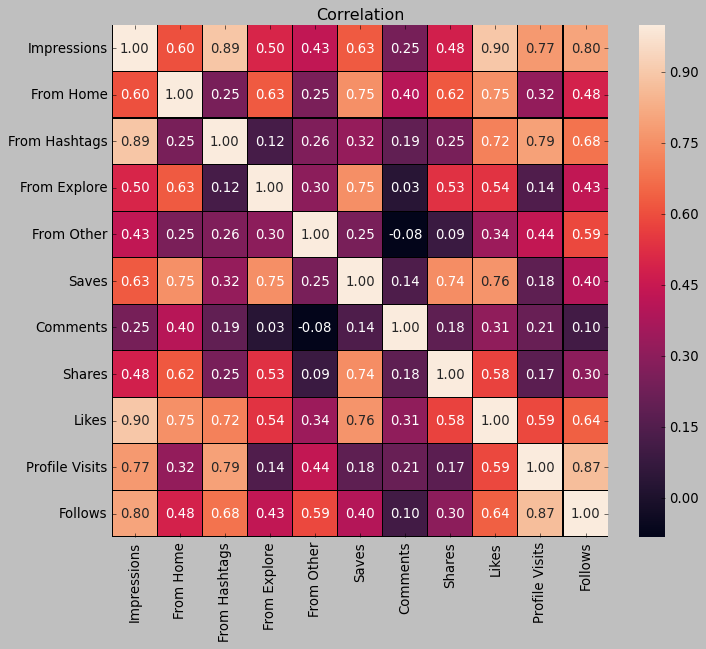

In [63]:
plt.figure(figsize=(10,8))
plt.title("Correlation")
sns.heatmap(correlation,annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")
plt.show()

So we can say that more likes and saves will help you get more reach on Instagram. The higher number of shares will also help you get more reach, but a low number of shares will not affect your reach either.

In Instagram, conversation rate means how many followers you are getting from the number of profile visits from a post. The formula that you can use to calculate conversion rate is (Follows/Profile Visits) * 100. Now let’s have a look at the conversation rate of my Instagram account:

In [64]:
conversion_rate = (data["Follows"].sum() / data["Profile Visits"].sum()) * 100
print(conversion_rate)

31.17770767613039


So the conversation rate of my Instagram account is 31% which sounds like a very good conversation rate. Let’s have a look at the relationship between the total profile visits and the number of followers gained from all profile visits:

In [65]:
figure = px.scatter(data_frame = data, x="Profile Visits",
                    y="Follows", size="Follows", trendline="ols", 
                    title = "Relationship Between Profile Visits and Followers Gained")
figure.show()

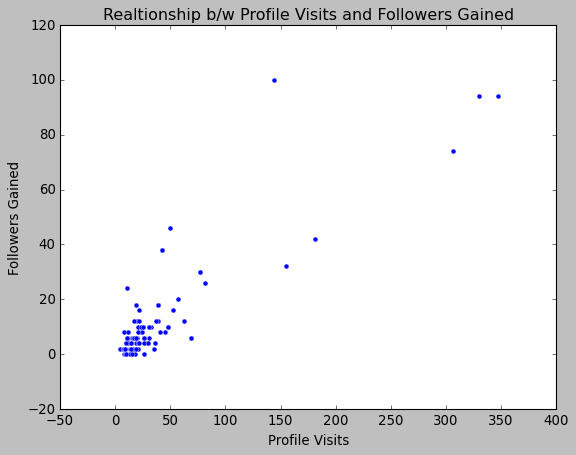

In [66]:
plt.figure(figsize=(8,6))
plt.title("Realtionship b/w Profile Visits and Followers Gained")
sns.scatterplot(x="Profile Visits",y="Follows",data=data)
plt.xlabel("Profile Visits")
plt.ylabel("Followers Gained")
plt.show()

The relationship between profile visits and followers gained is also linear.

Now in this section, I will train a machine learning model to predict the reach of an Instagram post. Let’s split the data into training and test sets before training the model:

In [67]:
data.columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')

In [68]:
x = np.array(data[['Likes', 'Saves', 'Comments', 'Shares', 
                   'Profile Visits', 'Follows']])
y = np.array(data["Impressions"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=42)

Now here’s is how we can train a machine learning model to predict the reach of an Instagram post using Python:

In [69]:
model = PassiveAggressiveRegressor()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.9175149192045203

Now let’s predict the reach of an Instagram post by giving inputs to the machine learning model:

In [70]:
# Features = [['Likes','Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']]
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
model.predict(features)

array([10128.29532753])